In [9]:
#Run this first before proceeding, this allows you to read the file and save it to a variable
import pandas as pd
#change file path to wherever you have the files
path = r'/Users/benrivera/Desktop/Test/HRTest.csv'
HR_Test= pd.read_csv(path)
path2 = r'/Users/benrivera/Desktop/Test/PWTest.csv'
PW_Test = pd.read_csv(path2)



    Weights Upper Body 

        Push

In [19]:
#Creats a filter to only show workouts labeld as "Weights: Push"
WPU = HR_Test.loc[HR_Test['Type']=='Weights: Push']
#resets the index
WPU = WPU.reset_index(drop=True)
#set the index
WPU = WPU.set_index('Count')
#drop the columns that are not necessary
WPU = WPU.drop(['Workout', 'Date', 'Type'], axis=1)

WPU

,Average Heart Rate (bpm),Time (min)
Count,,
1,118,39
2,102,46
3,100,49
4,107,42
5,99,52
6,99,50
7,103,46
8,99,43
9,110,43


In [4]:
#Testing whether or not I can make a predition model

import pandas as pd
from prophet import Prophet
m = Prophet(interval_width=0.95)
model = m.fit(WPU)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/benrivera/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:n_changepoints greater than number of observations. Using 10.



Initial log joint probability = -16.5443
Iteration  1. Log joint probability =    13.5592. Improved by 30.1035.
Iteration  2. Log joint probability =    19.5637. Improved by 6.00448.
Iteration  3. Log joint probability =    28.7132. Improved by 9.14955.
Iteration  4. Log joint probability =    35.2003. Improved by 6.48706.
Iteration  5. Log joint probability =    36.6249. Improved by 1.42461.
Iteration  6. Log joint probability =    36.6498. Improved by 0.02488.
Iteration  7. Log joint probability =    36.7068. Improved by 0.0570148.
Iteration  8. Log joint probability =    36.7249. Improved by 0.0180918.
Iteration  9. Log joint probability =    36.7364. Improved by 0.0115076.
Iteration 10. Log joint probability =    36.7467. Improved by 0.0103235.
Iteration 11. Log joint probability =    36.7504. Improved by 0.0036813.
Iteration 12. Log joint probability =    36.7513. Improved by 0.000895879.
Iteration 13. Log joint probability =    36.7516. Improved by 0.000323455.
Iteration 14. Log

In [5]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

/Users/benrivera/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/benrivera/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-03-21,30.248915,95.366237,115.469129,30.248915,30.248915,74.995168,74.995168,74.995168,74.995168,74.995168,74.995168,0.0,0.0,0.0,105.244083
1,2022-03-28,30.144815,94.046630,114.437534,30.144815,30.144815,74.995168,74.995168,74.995168,74.995168,74.995168,74.995168,0.0,0.0,0.0,105.139983
2,2022-04-04,30.040715,95.138036,115.508137,30.040715,30.040715,74.995168,74.995168,74.995168,74.995168,74.995168,74.995168,0.0,0.0,0.0,105.035883
3,2022-04-11,29.936615,94.625390,114.689485,29.936615,29.936615,74.995168,74.995168,74.995168,74.995168,74.995168,74.995168,0.0,0.0,0.0,104.931783
4,2022-04-18,29.833416,94.762433,114.782545,29.833416,29.833416,74.995168,74.995168,74.995168,74.995168,74.995168,74.995168,0.0,0.0,0.0,104.828584


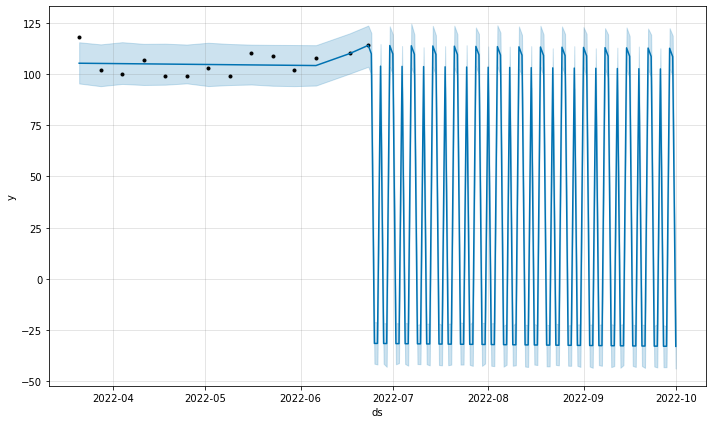

In [6]:
plot1 = m.plot(forecast)

In [13]:
import numpy as np

#finds the standard deviation of heart rates
stdWPU= np.std(WPU["Average Heart Rate (bpm)"])
#plan to remove the ones that don't might be outliers

stdWPU

5.836199490232999

In [14]:
#Allows us to see evaluate the average hearts rate of push workouts by filtering only those types
WPU = HR_Test.loc[HR_Test['Type']=='Weights: Push']
#resets the index
WPU = WPU.reset_index(drop=True)
WPU = WPU.set_index('Workout')
#Allows us to put Date into the correlation function
WPU['Date']=WPU['Date'].astype('category').cat.codes
#Finds the correlation between Average Heart Rate over multiple workouts, 
WPU_Corr = WPU['Count'].corr(WPU['Average Heart Rate (bpm)'])
WPU_Corr = "{:.2f}".format(WPU_Corr)
print('The correlation of Average Heart Rate for pull weights over multiple workouts is ' + str(WPU_Corr))

The correlation of Average Heart Rate for pull weights over multiple workouts is 0.22


        Pull

In [20]:
#Creats a filter to only show workouts labeld as "Weights: Pull"
WPL = HR_Test.loc[HR_Test['Type']=='Weights: Pull']
#resets the index
WPL = WPL.reset_index(drop=True)
#Drop unessecary columns
WPL = WPL.drop(['Workout', 'Date', 'Type'], axis=1)
#Set the index to the count
WPL = WPL.set_index('Count')
WPL

,Average Heart Rate (bpm),Time (min)
Count,,
1,114,45
2,105,40
3,118,45
4,120,40
5,112,39
6,111,35
7,118,36
8,106,38


In [21]:
#Allows us to see evaluate the average hearts rate of pull workouts by filtering only those types
WPL = HR_Test.loc[HR_Test['Type']=='Weights: Pull']
#resets the index
WPL = WPL.reset_index(drop=True)
WPL = WPL.set_index('Workout')
#Finds the correlation between Average Heart Rate over multiple workouts, 
WPL_Corr = WPL['Count'].corr(WPL['Average Heart Rate (bpm)'])
WPL_Corr = "{:.2f}".format(WPL_Corr )
print('The correlation of Average Heart Rate for pull weights over multiple workouts is ' + str(WPL_Corr))

The correlation of Average Heart Rate for pull weights over multiple workouts is -0.10


    Weigths: Lower Body 

In [22]:
WLB = HR_Test.loc[HR_Test['Type']=='Weights: Legs']
#resets index
WLB = WLB.reset_index(drop=True)
#Drop unessecary columns
WLB = WLB.drop(['Workout', 'Date', 'Type'], axis=1)
#Set the index to the count
WLB = WLB.set_index('Count')
WLB

,Average Heart Rate (bpm),Time (min)
Count,,
1,134,45
2,138,50
3,124,35
4,112,40
5,135,30


In [ ]:
WLB = HR_Test.loc[HR_Test['Type']=='Weights: Legs']
#resets index
WLB = WLB.reset_index(drop=True)
WLB = WLB.set_index('Workout')
#Finds the correlation between Average Heart Rate over multiple workouts, 
WLB_Corr = WLB['Count'].corr(WLB['Average Heart Rate (bpm)'])
WLB_Corr = "{:.2f}".format(WLB_Corr )
print('The correlation of Average Heart Rate for leg weights over multiple workouts is ' + str(WLB_Corr))

    Cardio: Elliptical

In [23]:
CE = HR_Test.loc[HR_Test['Type']=='Cardio: Elliptical']
#resets index
CE = CE.reset_index(drop=True)
#Drop unessecary columns
CE = CE.drop(['Workout', 'Date', 'Type'], axis=1)
#Set the index to the count
CE = CE.set_index('Count')
CE

,Average Heart Rate (bpm),Time (min)
Count,,
1,151,20
2,150,30
3,149,30
4,144,30
5,143,30


In [ ]:
CE = HR_Test.loc[HR_Test['Type']=='Cardio: Elliptical']
#resets index
CE = CE.reset_index(drop=True)
CE = CE.set_index('Workout')
#Finds the correlation between Average Heart Rate over multiple workouts, 
CE_Corr = CE['Count'].corr(CE['Average Heart Rate (bpm)'])
CE_Corr = "{:.2f}".format(CE_Corr )
print('The correlation of Average Heart Rate for elliptical over multiple workouts is ' + str(CE_Corr))

    Cardio: Treadmill

In [24]:
CT = HR_Test.loc[HR_Test['Type']=='Cardio: Treadmill']
#resets index
CT = CT.reset_index(drop=True)
#Drop unessecary columns
CT = CT.drop(['Workout', 'Date', 'Type'], axis=1)
#Set the index to the count
CT = CT.set_index('Count')
CT

,Average Heart Rate (bpm),Time (min)
Count,,
1,136,25
2,127,30
3,134,30
4,132,30
5,128,30
6,126,30


In [25]:
CT = HR_Test.loc[HR_Test['Type']=='Cardio: Treadmill']
#resets index
CT = CT.reset_index(drop=True)
CT = CT.set_index('Workout')
#Finds the correlation between Average Heart Rate over multiple workouts, 
CT_Corr = CT['Count'].corr(CT['Average Heart Rate (bpm)'])
CT_Corr = "{:.2f}".format(CT_Corr)
print('The correlation of Average Heart Rate for treadmill over multiple workouts is ' + str(CT_Corr))

The correlation of Average Heart Rate for treadmill over multiple workouts is -0.64


Pre Workout Test

In [ ]:
PW_Test

In [ ]:
#Allows Strings to be read as integers
PW_Test['Pre Workout']=PW_Test['Pre Workout'].astype('category').cat.codes

PW_Test.corr()